In [1]:
import numpy as np
import matplotlib.pyplot as plt

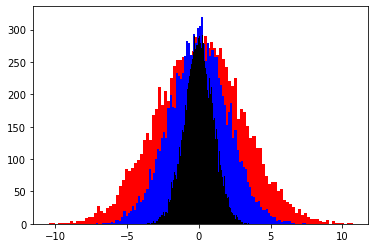

In [5]:
x = np.random.normal(loc=0, scale=1.0, size=10000)
y = np.random.normal(loc=0, scale=2.0, size=10000)
z = np.random.normal(loc=0, scale=3.0, size=10000)

plt.hist(z, bins=100, color='r')
plt.hist(y, bins=100, color='b')
plt.hist(x, bins=100, color='k')

plt.show()

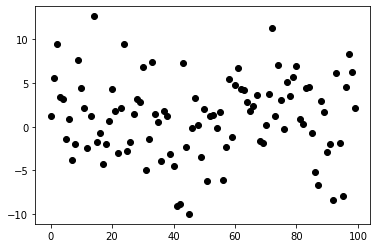

In [9]:
x = np.random.normal(loc=0, scale=5.0, size=100)
plt.plot(x, 'ko')
plt.show()

In [10]:
# PV = n R T
n = 10 # mol
R = 8.316 # J/mol/k

T = np.random.normal(loc=27, scale=2.0, size=100) + 273 # K
V = np.random.normal(loc=100, scale=1.0, size=100) # L

In [11]:
P = n * T * R / V

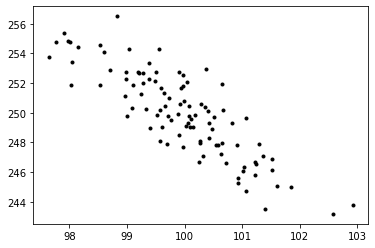

In [13]:
plt.plot(V, P, 'k.')
plt.show()

In [14]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel

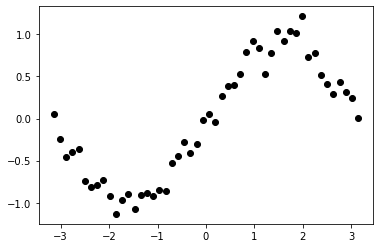

In [19]:
xn = np.linspace(-3.14, 3.14, num=50).reshape(-1, 1)
yn = np.sin(xn) + 0.1 * np.random.randn(50, 1).reshape(-1, 1)

plt.plot(xn, yn, 'ko')
plt.show()

# 1 D GPR

In [20]:
K = RBF(length_scale=0.5) + WhiteKernel(noise_level=0.1)
gpr = GaussianProcessRegressor(kernel=K)

In [21]:
gpr.fit(xn, yn)

GaussianProcessRegressor(kernel=RBF(length_scale=0.5) + WhiteKernel(noise_level=0.1))

In [28]:
X = np.linspace(-10, 10, num=1000).reshape(-1, 1)
pred, sd = gpr.predict(X, return_std=True)

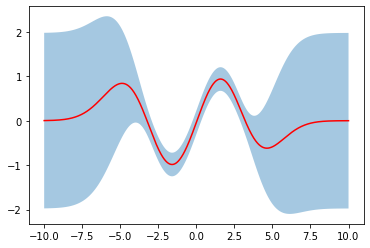

In [29]:
sd = sd.reshape(-1, 1)

plt.plot(X, pred, 'r-')
plt.fill(np.concatenate([X, X[::-1]]), np.concatenate([pred + 1.96 * sd, (pred - 1.96 * sd)[::-1]]), alpha=0.4)
plt.show()

# Multi D GPR

In [30]:
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import r2_score

In [31]:
cd = pd.read_csv("../data/c_0_train.csv", index_col=0)
dd = pd.read_csv("../data/d_0_train.csv", index_col=0)

In [34]:
y2 = cd[cd.columns[-2]]
y1 = cd[cd.columns[-1]]

In [37]:
xtot = pd.concat([cd[cd.columns[:-2]], dd[dd.columns[:-2]]], axis=1)

In [38]:
xtot

,goldschmidt_TF,goldschmidt_TF_ionic,octahedral_factor,octahedral_factor_ionic,A_O,B_O,A_B,num_of_atoms_Asite0,shannon_radii_Asite0,Asite0_Ionic Radius (angstroms),...,Bsite_IsNonmetal_range,Bsite_NdUnfilled_range,Bsite_NdValence_range,Bsite_NfUnfilled_range,Bsite_NfValence_range,Bsite_NpUnfilled_range,Bsite_NpValence_range,Bsite_NsUnfilled_range,Bsite_NsValence_range,Bsite_NUnfilled_range
1.0,1.021823,0.976828,0.414286,0.385714,2.86125,1.98000,2.04125,1.0,1.610,1.42,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2.0,0.987385,0.889057,0.378571,0.464286,2.69500,1.93000,1.82500,2.0,1.610,1.42,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.0,0.976009,0.908360,0.452857,0.392857,2.80750,2.03400,2.04150,2.0,1.610,1.42,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4.0,1.026809,0.865275,0.342857,0.492857,2.73000,1.88000,1.81000,2.0,1.610,1.42,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5.0,0.909001,0.916519,0.452857,0.392857,2.61475,2.03400,1.84875,2.0,1.610,1.42,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1925.0,0.886682,0.875853,0.409821,0.395536,2.47500,1.97375,1.64875,8.0,1.075,1.02,...,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
1926.0,0.885561,0.877538,0.411607,0.392857,2.47500,1.97625,1.65125,8.0,1.075,1.02,...,0.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
1927.0,0.880880,0.881493,0.419107,0.386607,2.47500,1.98675,1.66175,8.0,1.075,1.02,...,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
1928.0,0.889499,0.873618,0.405357,0.399107,2.47500,1.96750,1.64250,8.0,1.075,1.02,...,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0


In [41]:
y = y2.copy()
ye = y2[y < 400]
yf = y1[y < 400]
xt = xtot[y < 400] 

In [43]:
scaler = preprocessing.StandardScaler().fit(xt)
xscaled = scaler.transform(xt)

In [45]:
from sklearn.model_selection import train_test_split

In [65]:
xtr, xtest, ytr, ytest = train_test_split(xscaled, yf, test_size = 200)

In [66]:
K = 1.0 * RBF(length_scale=0.5) + WhiteKernel(noise_level=0.5)

gpr2 = GaussianProcessRegressor(kernel=K)
gpr2.fit(xtr, ytr)

GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=0.5) + WhiteKernel(noise_level=0.5))

In [67]:
ypred, sd = gpr2.predict(xtest, return_std=True)

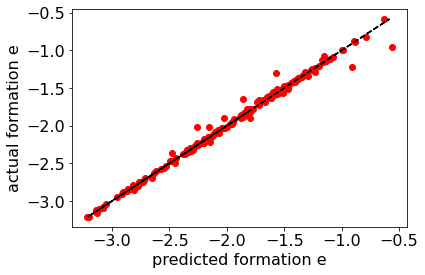

In [71]:
plt.rc('font', size=16)
plt.plot(ypred, ytest, 'ro')
plt.plot(ytest, ytest, 'k--')
plt.xlabel("predicted formation e")
plt.ylabel("actual formation e")
plt.show()

In [72]:
r2_score(ypred, ytest)

0.9917686331062407